# Ford GoBike System Data Visualizations
## by (Jahnavi Pinnamraju)

## Introduction
The dataset is from a sharing bicycle system called Ford GoBike which is located in San Francisco, California and it has been opreating since 2013. The datasets are available in Kaggle. I am analysing september 2018 data. 

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import calendar



%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_csv('201809-fordgobike-tripdata.csv.zip')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,76491,2018-09-30 18:37:01.7710,2018-10-01 15:51:53.5530,120.0,Mission Dolores Park,37.761420,-122.426435,26.0,1st St at Folsom St,37.787290,-122.394380,903,Customer,1998.0,Female,No
1,50832,2018-09-30 19:49:31.9530,2018-10-01 09:56:44.7320,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.410000,-121.940000,4154,Customer,1992.0,Male,No
2,74498,2018-09-30 11:34:44.7970,2018-10-01 08:16:23.3570,55.0,Webster St at Grove St,37.777053,-122.429558,55.0,Webster St at Grove St,37.777053,-122.429558,2696,Customer,NaN,NaN,No
3,79396,2018-09-30 10:12:49.9400,2018-10-01 08:16:06.0440,11.0,Davis St at Jackson St,37.797280,-122.398436,55.0,Webster St at Grove St,37.777053,-122.429558,2458,Customer,1990.0,Male,No
4,60287,2018-09-30 15:28:03.5560,2018-10-01 08:12:50.7870,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2497,Customer,NaN,NaN,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186217 entries, 0 to 186216
Data columns (total 16 columns):
duration_sec               186217 non-null int64
start_time                 186217 non-null object
end_time                   186217 non-null object
start_station_id           184635 non-null float64
start_station_name         184635 non-null object
start_station_latitude     186217 non-null float64
start_station_longitude    186217 non-null float64
end_station_id             184635 non-null float64
end_station_name           184635 non-null object
end_station_latitude       186217 non-null float64
end_station_longitude      186217 non-null float64
bike_id                    186217 non-null int64
user_type                  186217 non-null object
member_birth_year          176303 non-null float64
member_gender              176338 non-null object
bike_share_for_all_trip    186217 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,186217.000000,184635.000000,186217.000000,186217.000000,184635.000000,186217.000000,186217.000000,186217.000000,176303.000000
mean,880.127996,125.614125,37.765030,-122.345885,124.440783,37.765094,-122.345631,2394.413233,1983.836407
std,2370.927919,104.652768,0.109528,0.126872,104.757142,0.109386,0.126454,1308.322486,10.234988
min,61.000000,3.000000,37.263310,-122.444293,3.000000,37.263310,-122.444293,11.000000,1888.000000
25%,358.000000,36.000000,37.770407,-122.409851,34.000000,37.771058,-122.408531,1301.000000,1979.000000
50%,571.000000,92.000000,37.781074,-122.397086,90.000000,37.781074,-122.395936,2445.000000,1986.000000
75%,895.000000,197.000000,37.797280,-122.281051,197.000000,37.797280,-122.283282,3467.000000,1991.000000
max,86281.000000,374.000000,37.880222,-121.830000,374.000000,37.880222,-121.830000,4465.000000,2000.000000


In [6]:
pd.isna(df).sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id           1582
start_station_name         1582
start_station_latitude        0
start_station_longitude       0
end_station_id             1582
end_station_name           1582
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          9914
member_gender              9879
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(186217, 16)

In [9]:
df.nunique()

duration_sec                 6149
start_time                 186201
end_time                   186205
start_station_id              313
start_station_name            313
start_station_latitude        322
start_station_longitude       323
end_station_id                314
end_station_name              314
end_station_latitude          324
end_station_longitude         324
bike_id                      3045
user_type                       2
member_birth_year              73
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [10]:
# Data cleaning
#dropping missing values from member_gender
df.dropna(subset=['member_gender'])


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,76491,2018-09-30 18:37:01.7710,2018-10-01 15:51:53.5530,120.0,Mission Dolores Park,37.761420,-122.426435,26.0,1st St at Folsom St,37.787290,-122.394380,903,Customer,1998.0,Female,No
1,50832,2018-09-30 19:49:31.9530,2018-10-01 09:56:44.7320,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.410000,-121.940000,4154,Customer,1992.0,Male,No
3,79396,2018-09-30 10:12:49.9400,2018-10-01 08:16:06.0440,11.0,Davis St at Jackson St,37.797280,-122.398436,55.0,Webster St at Grove St,37.777053,-122.429558,2458,Customer,1990.0,Male,No
5,70755,2018-09-30 12:26:06.6710,2018-10-01 08:05:22.5950,188.0,Dover St at 57th St,37.842630,-122.267738,190.0,West St at 40th St,37.830223,-122.270950,1483,Customer,1985.0,Male,No
6,57147,2018-09-30 15:06:12.7180,2018-10-01 06:58:40.4270,50.0,2nd St at Townsend St,37.780526,-122.390288,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,2706,Customer,1996.0,Male,No
7,20180,2018-09-30 20:13:33.6250,2018-10-01 01:49:53.6560,73.0,Pierce St at Haight St,37.771793,-122.433708,97.0,14th St at Mission St,37.768265,-122.420110,3979,Subscriber,1983.0,Female,No
8,3333,2018-09-30 23:39:58.2460,2018-10-01 00:35:31.7470,327.0,5th St at San Salvador St,37.332039,-121.881766,327.0,5th St at San Salvador St,37.332039,-121.881766,1597,Customer,2000.0,Male,No
11,726,2018-09-30 23:58:38.4760,2018-10-01 00:10:45.0110,58.0,Market St at 10th St,37.776619,-122.417385,81.0,Berry St at 4th St,37.775880,-122.393170,3972,Subscriber,1988.0,Male,No
13,310,2018-09-30 23:58:12.1460,2018-10-01 00:03:22.8080,227.0,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,237.0,Fruitvale BART Station,37.775232,-122.224498,2675,Subscriber,1997.0,Male,Yes
14,163,2018-09-30 23:59:12.2940,2018-10-01 00:01:55.4810,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,1213,Subscriber,1983.0,Female,No


In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,76491,2018-09-30 18:37:01.7710,2018-10-01 15:51:53.5530,120.0,Mission Dolores Park,37.761420,-122.426435,26.0,1st St at Folsom St,37.787290,-122.394380,903,Customer,1998.0,Female,No
1,50832,2018-09-30 19:49:31.9530,2018-10-01 09:56:44.7320,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.410000,-121.940000,4154,Customer,1992.0,Male,No
2,74498,2018-09-30 11:34:44.7970,2018-10-01 08:16:23.3570,55.0,Webster St at Grove St,37.777053,-122.429558,55.0,Webster St at Grove St,37.777053,-122.429558,2696,Customer,NaN,NaN,No
3,79396,2018-09-30 10:12:49.9400,2018-10-01 08:16:06.0440,11.0,Davis St at Jackson St,37.797280,-122.398436,55.0,Webster St at Grove St,37.777053,-122.429558,2458,Customer,1990.0,Male,No
4,60287,2018-09-30 15:28:03.5560,2018-10-01 08:12:50.7870,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2497,Customer,NaN,NaN,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186217 entries, 0 to 186216
Data columns (total 16 columns):
duration_sec               186217 non-null int64
start_time                 186217 non-null object
end_time                   186217 non-null object
start_station_id           184635 non-null float64
start_station_name         184635 non-null object
start_station_latitude     186217 non-null float64
start_station_longitude    186217 non-null float64
end_station_id             184635 non-null float64
end_station_name           184635 non-null object
end_station_latitude       186217 non-null float64
end_station_longitude      186217 non-null float64
bike_id                    186217 non-null int64
user_type                  186217 non-null object
member_birth_year          176303 non-null float64
member_gender              176338 non-null object
bike_share_for_all_trip    186217 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [13]:
df['bike_id'].value_counts()

4394    328
4464    321
4327    290
4378    290
4452    281
4371    281
4331    278
4402    276
4451    275
4359    274
4457    269
4456    267
4342    256
4336    255
4348    253
4369    249
3981    248
4443    248
4370    246
4387    243
4435    242
4430    242
4214    239
4335    238
4404    235
4329    234
4418    234
4442    233
4374    230
4462    230
       ... 
574       2
1978      2
1031      2
4283      2
62        2
2997      2
1205      2
602       1
4236      1
611       1
4096      1
3435      1
3354      1
4124      1
3714      1
1335      1
3586      1
1440      1
3189      1
3715      1
4123      1
2284      1
2119      1
3782      1
3913      1
3351      1
2066      1
3180      1
3886      1
1088      1
Name: bike_id, Length: 3045, dtype: int64

In [14]:
df["member_gender"].value_counts()

Male      128759
Female     45145
Other       2434
Name: member_gender, dtype: int64

In [15]:
df["user_type"].value_counts()

Subscriber    156124
Customer       30093
Name: user_type, dtype: int64

In [16]:
#dropping missing values from start_station_id
df.dropna(subset=['start_station_id'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186217 entries, 0 to 186216
Data columns (total 16 columns):
duration_sec               186217 non-null int64
start_time                 186217 non-null object
end_time                   186217 non-null object
start_station_id           184635 non-null float64
start_station_name         184635 non-null object
start_station_latitude     186217 non-null float64
start_station_longitude    186217 non-null float64
end_station_id             184635 non-null float64
end_station_name           184635 non-null object
end_station_latitude       186217 non-null float64
end_station_longitude      186217 non-null float64
bike_id                    186217 non-null int64
user_type                  186217 non-null object
member_birth_year          176303 non-null float64
member_gender              176338 non-null object
bike_share_for_all_trip    186217 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [17]:
#converting starttime and endtime to datetime datatype
df['start_time_dayofweek'] = pd.to_datetime(df['start_time'])
df['end_time_dayofweek'] = pd.to_datetime(df['end_time'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186217 entries, 0 to 186216
Data columns (total 18 columns):
duration_sec               186217 non-null int64
start_time                 186217 non-null object
end_time                   186217 non-null object
start_station_id           184635 non-null float64
start_station_name         184635 non-null object
start_station_latitude     186217 non-null float64
start_station_longitude    186217 non-null float64
end_station_id             184635 non-null float64
end_station_name           184635 non-null object
end_station_latitude       186217 non-null float64
end_station_longitude      186217 non-null float64
bike_id                    186217 non-null int64
user_type                  186217 non-null object
member_birth_year          176303 non-null float64
member_gender              176338 non-null object
bike_share_for_all_trip    186217 non-null object
start_time_dayofweek       186217 non-null datetime64[ns]
end_time_dayofweek        

In [19]:
#calculating member_Age from the birthyear
df['member_age'] = pd.to_datetime(df.start_time).dt.year - df['member_birth_year']
df['member_age'] = df['member_age'].astype(int, errors='ignore')
df['member_birth_year'] = df['member_birth_year'].astype(int, errors='ignore')

In [20]:
#converting starttime and endtime to datetime format
df[['start_time','end_time']]= df[['start_time','end_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [21]:
df['start_month']= df.start_time.dt.strftime('%b')
df['start_day_week']= df.start_time.dt.strftime('%a')
df['start_hour']= df.start_time.dt.strftime('%H')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,end_time_dayofweek,member_age,start_month,start_day_week,start_hour
0,76491,2018-09-30 18:37:01.771,2018-10-01 15:51:53.553,120.0,Mission Dolores Park,37.761420,-122.426435,26.0,1st St at Folsom St,37.787290,...,Customer,1998.0,Female,No,2018-09-30 18:37:01.771,2018-10-01 15:51:53.553,20.0,Sep,Sun,18
1,50832,2018-09-30 19:49:31.953,2018-10-01 09:56:44.732,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.410000,...,Customer,1992.0,Male,No,2018-09-30 19:49:31.953,2018-10-01 09:56:44.732,26.0,Sep,Sun,19
2,74498,2018-09-30 11:34:44.797,2018-10-01 08:16:23.357,55.0,Webster St at Grove St,37.777053,-122.429558,55.0,Webster St at Grove St,37.777053,...,Customer,NaN,NaN,No,2018-09-30 11:34:44.797,2018-10-01 08:16:23.357,NaN,Sep,Sun,11
3,79396,2018-09-30 10:12:49.940,2018-10-01 08:16:06.044,11.0,Davis St at Jackson St,37.797280,-122.398436,55.0,Webster St at Grove St,37.777053,...,Customer,1990.0,Male,No,2018-09-30 10:12:49.940,2018-10-01 08:16:06.044,28.0,Sep,Sun,10
4,60287,2018-09-30 15:28:03.556,2018-10-01 08:12:50.787,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,2018-09-30 15:28:03.556,2018-10-01 08:12:50.787,NaN,Sep,Sun,15


In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,end_time_dayofweek,member_age,start_month,start_day_week,start_hour
0,76491,2018-09-30 18:37:01.771,2018-10-01 15:51:53.553,120.0,Mission Dolores Park,37.761420,-122.426435,26.0,1st St at Folsom St,37.787290,...,Customer,1998.0,Female,No,2018-09-30 18:37:01.771,2018-10-01 15:51:53.553,20.0,Sep,Sun,18
1,50832,2018-09-30 19:49:31.953,2018-10-01 09:56:44.732,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.410000,...,Customer,1992.0,Male,No,2018-09-30 19:49:31.953,2018-10-01 09:56:44.732,26.0,Sep,Sun,19
2,74498,2018-09-30 11:34:44.797,2018-10-01 08:16:23.357,55.0,Webster St at Grove St,37.777053,-122.429558,55.0,Webster St at Grove St,37.777053,...,Customer,NaN,NaN,No,2018-09-30 11:34:44.797,2018-10-01 08:16:23.357,NaN,Sep,Sun,11
3,79396,2018-09-30 10:12:49.940,2018-10-01 08:16:06.044,11.0,Davis St at Jackson St,37.797280,-122.398436,55.0,Webster St at Grove St,37.777053,...,Customer,1990.0,Male,No,2018-09-30 10:12:49.940,2018-10-01 08:16:06.044,28.0,Sep,Sun,10
4,60287,2018-09-30 15:28:03.556,2018-10-01 08:12:50.787,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,2018-09-30 15:28:03.556,2018-10-01 08:12:50.787,NaN,Sep,Sun,15


In [23]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age
count,186217.000000,184635.000000,186217.000000,186217.000000,184635.000000,186217.000000,186217.000000,186217.000000,176303.000000,176303.000000
mean,880.127996,125.614125,37.765030,-122.345885,124.440783,37.765094,-122.345631,2394.413233,1983.836407,34.163593
std,2370.927919,104.652768,0.109528,0.126872,104.757142,0.109386,0.126454,1308.322486,10.234988,10.234988
min,61.000000,3.000000,37.263310,-122.444293,3.000000,37.263310,-122.444293,11.000000,1888.000000,18.000000
25%,358.000000,36.000000,37.770407,-122.409851,34.000000,37.771058,-122.408531,1301.000000,1979.000000,27.000000
50%,571.000000,92.000000,37.781074,-122.397086,90.000000,37.781074,-122.395936,2445.000000,1986.000000,32.000000
75%,895.000000,197.000000,37.797280,-122.281051,197.000000,37.797280,-122.283282,3467.000000,1991.000000,39.000000
max,86281.000000,374.000000,37.880222,-121.830000,374.000000,37.880222,-121.830000,4465.000000,2000.000000,130.000000


### What is the structure of your dataset?

My dataset is fordgobike-tripdata.It has 176338 rows and 16 columns. It has features such as start time, endtime, station names, bike id, user types,member gender, birth year etc.




### What is/are the main feature(s) of interest in your dataset?

 I am interested to investigate user type, member gender and the time taken by the users for biking.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think the data elements such as user type,gender,member birth year,start time will help support my investigation. 







## Univariate Exploration



In [24]:
#defining function for the plot title,xlabel and ylabel
def plotMetadata(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)


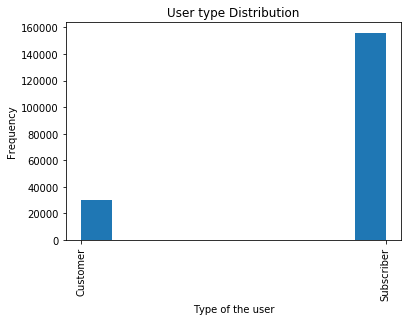

In [25]:
#setting the tick locations 
plt.xticks(rotation=90)
plotMetadata('Type of the user', 'Frequency', 'User type Distribution')
#plotting the histogram
plt.hist(data = df, x = 'user_type');

Subscribers were more in number when compared to Customers.

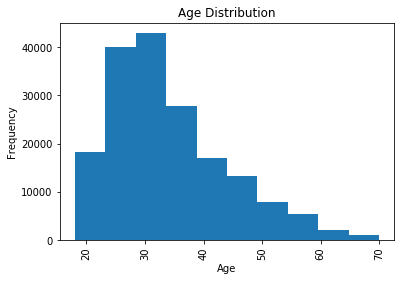

In [48]:
#setting the tick locations 
plt.xticks(rotation=90)
plotMetadata('Age', 'Frequency', 'Age Distribution')
#plotting the histogram
plt.hist(data = df, x = 'member_age');

People around 20-40 age were involved more when compared to other age groups.

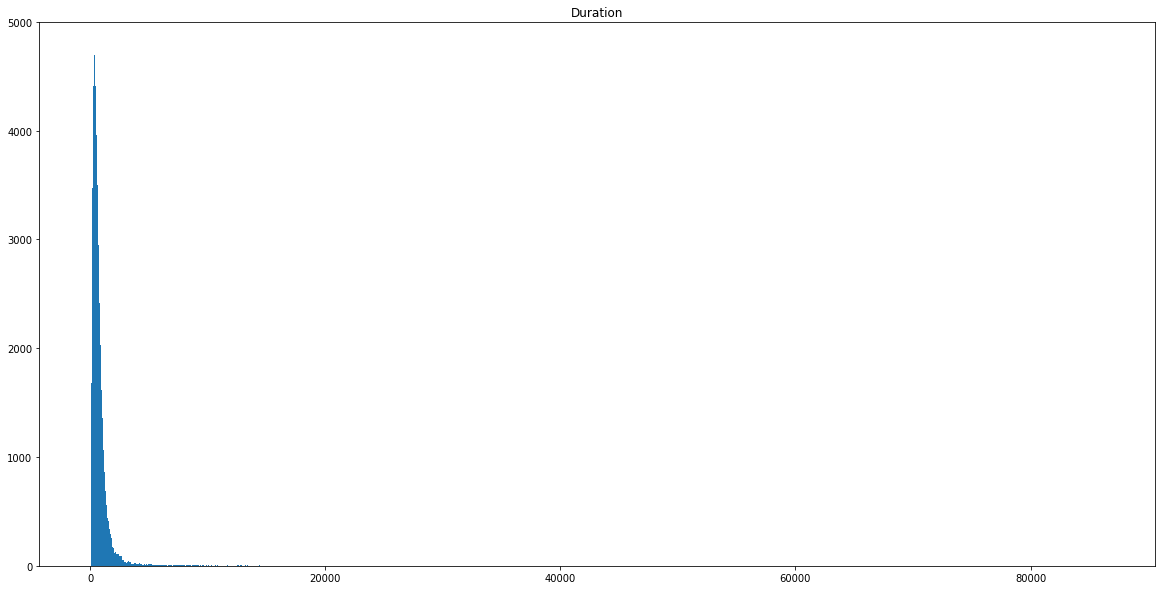

In [27]:
binsize = 20
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
#setting figure dimensions
plt.figure(figsize=[20, 10])
#setting the plot title
plt.title('Duration')
#plotting histogram
plt.hist(data = df, x = 'duration_sec', bins=bins);

A peak can be observed at around 4000 sec. approximately.

In [28]:
df['duration_sec'].describe()


count    186217.000000
mean        880.127996
std        2370.927919
min          61.000000
25%         358.000000
50%         571.000000
75%         895.000000
max       86281.000000
Name: duration_sec, dtype: float64

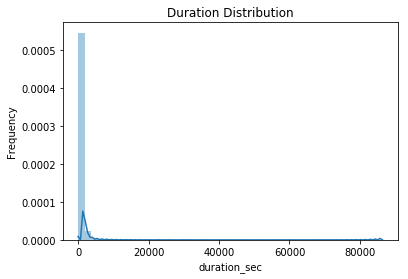

In [29]:
#plotting distplot considering duration in sec.
plotMetadata('Time in sec', 'Frequency', 'Duration Distribution')

sb.distplot(df['duration_sec'])

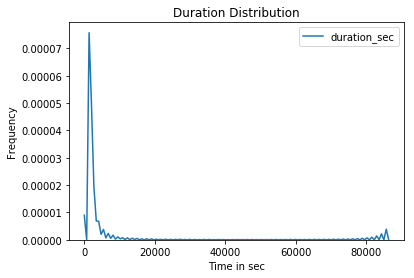

In [30]:

plotMetadata('Time in sec', 'Frequency', 'Duration Distribution')

sb.kdeplot(df['duration_sec']);


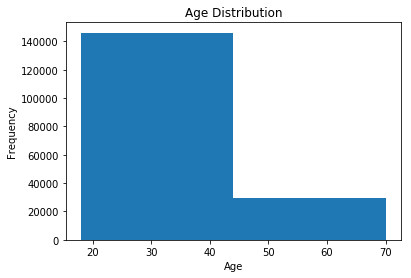

In [49]:
#plotting histogram for the member age column
plt.hist(data=df,x='member_age', bins=2);

plotMetadata('Age', 'Frequency', 'Age Distribution')


A higher frequency of duration was observed for the users who are between 40-50 years of age.

In [32]:
df['member_age'].describe()


count    176303.000000
mean         34.163593
std          10.234988
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         130.000000
Name: member_age, dtype: float64

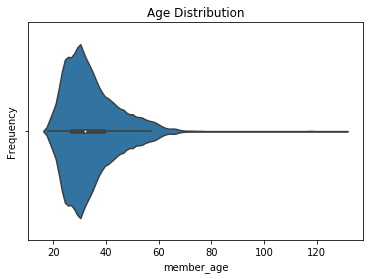

In [33]:
#plotting a violinplot considering member_Age
#setting the title, xlabel and ylabel


plotMetadata('Age', 'Frequency', 'Age Distribution')

sb.violinplot(data = df, x = 'member_age');

There was a wide distribution among people around 40 years of age.

In [34]:
df = df[df['member_age'] <= 70]
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,end_time_dayofweek,member_age,start_month,start_day_week,start_hour
0,76491,2018-09-30 18:37:01.771,2018-10-01 15:51:53.553,120.0,Mission Dolores Park,37.761420,-122.426435,26.0,1st St at Folsom St,37.787290,...,Customer,1998.0,Female,No,2018-09-30 18:37:01.771,2018-10-01 15:51:53.553,20.0,Sep,Sun,18
1,50832,2018-09-30 19:49:31.953,2018-10-01 09:56:44.732,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.410000,...,Customer,1992.0,Male,No,2018-09-30 19:49:31.953,2018-10-01 09:56:44.732,26.0,Sep,Sun,19
3,79396,2018-09-30 10:12:49.940,2018-10-01 08:16:06.044,11.0,Davis St at Jackson St,37.797280,-122.398436,55.0,Webster St at Grove St,37.777053,...,Customer,1990.0,Male,No,2018-09-30 10:12:49.940,2018-10-01 08:16:06.044,28.0,Sep,Sun,10
5,70755,2018-09-30 12:26:06.671,2018-10-01 08:05:22.595,188.0,Dover St at 57th St,37.842630,-122.267738,190.0,West St at 40th St,37.830223,...,Customer,1985.0,Male,No,2018-09-30 12:26:06.671,2018-10-01 08:05:22.595,33.0,Sep,Sun,12
6,57147,2018-09-30 15:06:12.718,2018-10-01 06:58:40.427,50.0,2nd St at Townsend St,37.780526,-122.390288,8.0,The Embarcadero at Vallejo St,37.799953,...,Customer,1996.0,Male,No,2018-09-30 15:06:12.718,2018-10-01 06:58:40.427,22.0,Sep,Sun,15


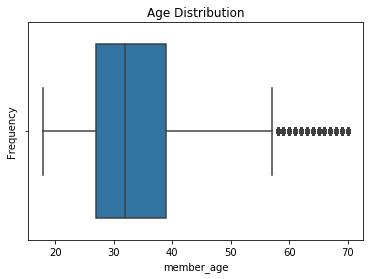

In [35]:

plotMetadata('Age', 'Frequency', 'Age Distribution')

#plotting a boxplot
sb.boxplot(data = df, x = 'member_age');


We can observe that there were more people around 35-40 years of age.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?¶


I found the variable duration to be interesting. We can observe a peat at approximately 900 seconds and later the distribution fell down with out reaching a peak again.


## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶

The dataset contains the birthyears of the members. So inorder to make the data analysis better, I have calculated the member_Age from the birthyear. The start time and endtime were converted to datetime data type and the datatype of start day was converted and renamed as start day week.








## Bivariate Exploration


In [36]:
num = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age']
cat = ['start_station_name','end_station_name', 'member_gender', 'bike_share_for_all_trip','user_type']

In [37]:
#checking the correlation 
df[num].corr()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age
duration_sec,1.000000,-0.023851,-0.001049,-0.017929,-0.015180,-0.001073,-0.018582,0.023880,0.002799,-0.002799
start_station_id,-0.023851,1.000000,-0.268000,0.563702,0.445929,-0.256978,0.563515,-0.137304,0.125862,-0.125862
start_station_latitude,-0.001049,-0.268000,1.000000,-0.753204,-0.256358,0.992604,-0.758466,0.036332,-0.115666,0.115666
start_station_longitude,-0.017929,0.563702,-0.753204,1.000000,0.570185,-0.757489,0.994759,-0.160916,0.144949,-0.144949
end_station_id,-0.015180,0.445929,-0.256358,0.570185,1.000000,-0.274764,0.565700,-0.133904,0.121269,-0.121269
end_station_latitude,-0.001073,-0.256978,0.992604,-0.757489,-0.274764,1.000000,-0.760380,0.036517,-0.115928,0.115928
end_station_longitude,-0.018582,0.563515,-0.758466,0.994759,0.565700,-0.760380,1.000000,-0.161757,0.144499,-0.144499
bike_id,0.023880,-0.137304,0.036332,-0.160916,-0.133904,0.036517,-0.161757,1.000000,-0.021386,0.021386
member_birth_year,0.002799,0.125862,-0.115666,0.144949,0.121269,-0.115928,0.144499,-0.021386,1.000000,-1.000000
member_age,-0.002799,-0.125862,0.115666,-0.144949,-0.121269,0.115928,-0.144499,0.021386,-1.000000,1.000000


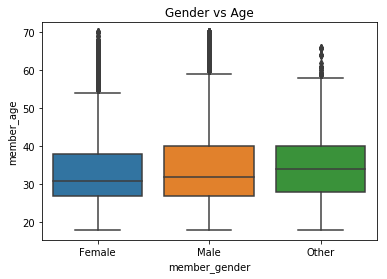

In [38]:
#plotting a boxplot 
#setting title


plotMetadata('Member_gender', 'Member_Age', 'Gender vs Age')

sb.boxplot(data = df, x = 'member_gender', y = 'member_age');

Males were more when compared to females.

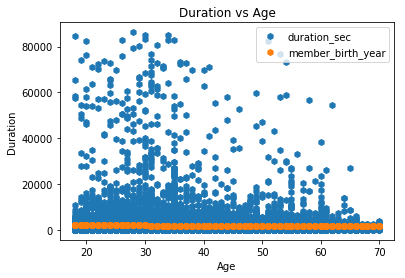

In [39]:
#plotting the member age, duration and brithyear
df.plot(x='member_age', y=['duration_sec','member_birth_year'],marker='h',linestyle='')

plotMetadata('Age', 'Duration', 'Duration vs Age')


plt.show()

More people in the lower limit. The density was less in the upper limits.

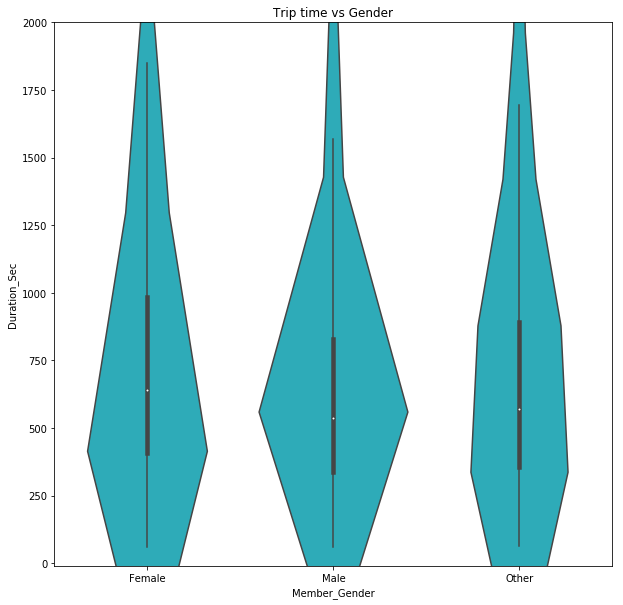

In [40]:
#setting figure dimensions
plt.figure(figsize = [10, 10])
#setting color
base_color = sb.color_palette()[9]
#plotting violin plot considering gender and duration
sb.violinplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plotMetadata('Member_Gender', 'Duration_Sec', 'Trip time vs Gender')

plt.show()

There was a wide distribution for males when compared to other 2 groups.

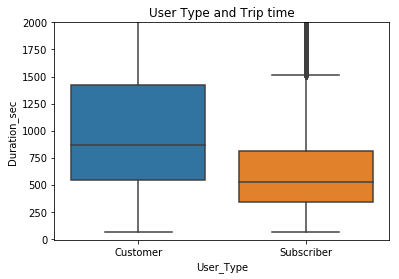

In [41]:
plt.ylim([-10, 2000])
#plotting boxplot for user type and duration
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec');
#setting plot title

plotMetadata('User_Type', 'Duration_sec', 'User Type and Trip time')

plt.show()

Customers took more time for the ride when compared to subscribers.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175859 entries, 0 to 186216
Data columns (total 22 columns):
duration_sec               175859 non-null int64
start_time                 175859 non-null datetime64[ns]
end_time                   175859 non-null datetime64[ns]
start_station_id           174326 non-null float64
start_station_name         174326 non-null object
start_station_latitude     175859 non-null float64
start_station_longitude    175859 non-null float64
end_station_id             174326 non-null float64
end_station_name           174326 non-null object
end_station_latitude       175859 non-null float64
end_station_longitude      175859 non-null float64
bike_id                    175859 non-null int64
user_type                  175859 non-null object
member_birth_year          175859 non-null float64
member_gender              175859 non-null object
bike_share_for_all_trip    175859 non-null object
start_time_dayofweek       175859 non-null datetime64[ns]
end_time_d

Customers took more time for the trip when compared to subscribers.

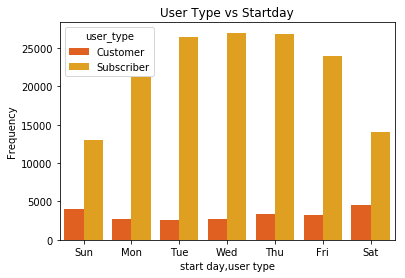

In [43]:

sb.countplot(data = df, x = 'start_day_week', order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], hue = 'user_type', palette = 'autumn');

plotMetadata('start day,user type', 'Frequency', 'User Type vs Startday')


Wednesday and Thursday has more number of trips involving Subscribers.

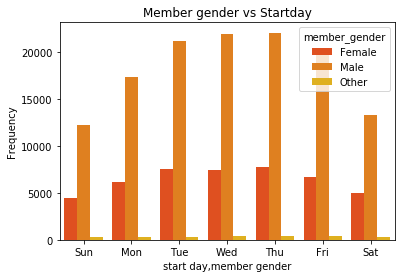

In [44]:
#plotting countplot for the weekday and member gender
sb.countplot(data = df, x = 'start_day_week', order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], hue = 'member_gender', palette = 'autumn');

plotMetadata('start day,member gender', 'Frequency', 'Member gender vs Startday')


Wednesday and Thursday has more number of trips and Males were more when compared to other categories. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a relationship between the meber age and trip duration. There is no impact of place of the stations on the trip duration. When compared to males, females drove longer. In the user type, customer category drove more time when comared to subscribers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Most of the users were males.Most of the users took more than 800 sec for the trip. When compared to females, males participated in trip at older ages. Although customers were more when compared to subscribers, the mean age of subscribers is more when compared to customers.



## Multivariate Exploration


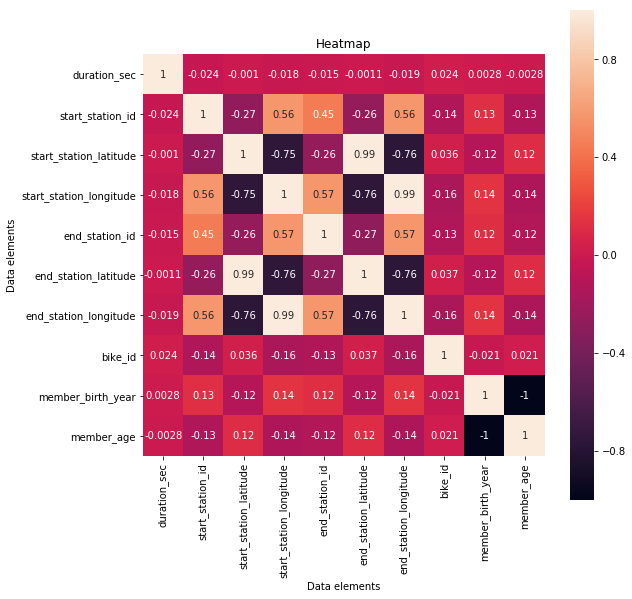

In [45]:
#setting figure dimensions
plt.figure(figsize=(9,9))
#plotting heatmap for all the variables in the dataset
sb.heatmap(df[num].corr(), annot = True, square= True);

plotMetadata('Data elements', 'Data elements', 'Heatmap')

plt.show()

There was a positive correlation between startstation id and start station longitude,end station longitude and start station longitude.

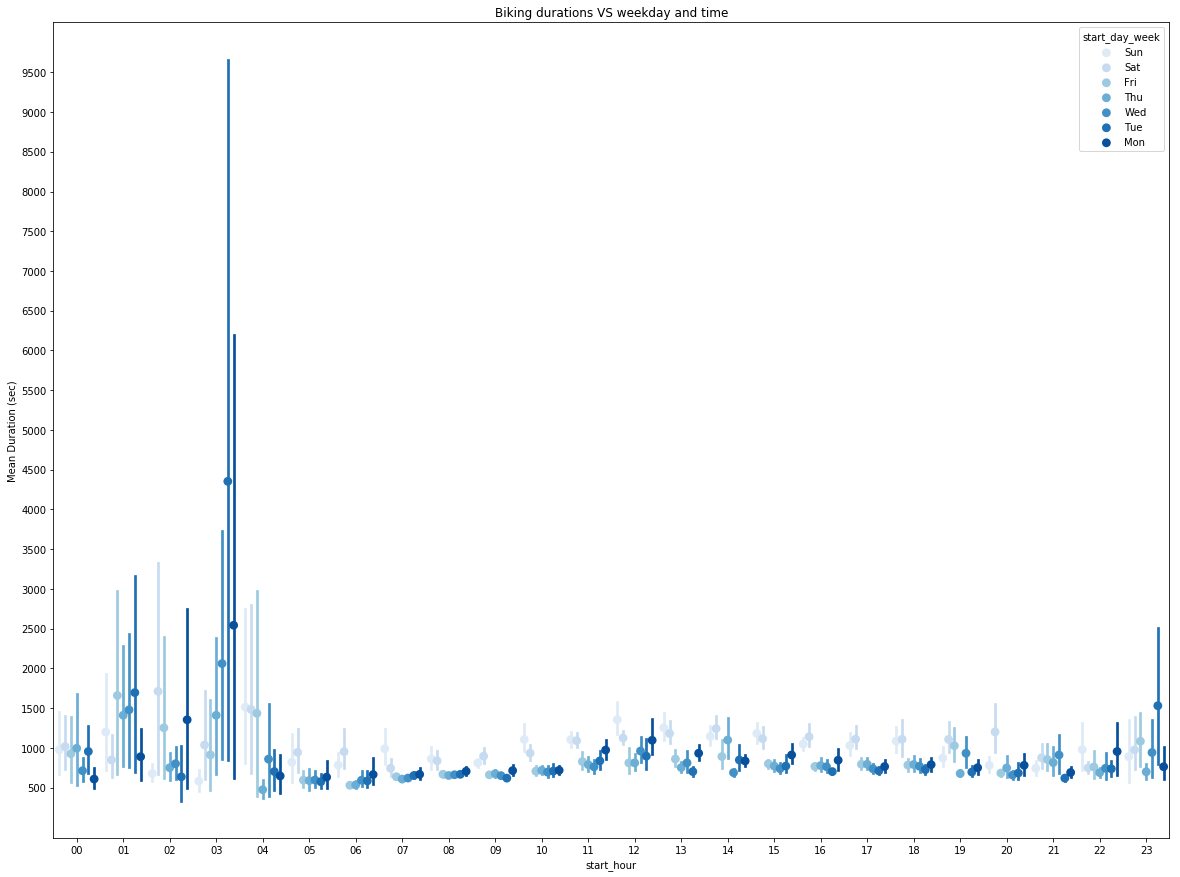

In [46]:
#setting figure dimensions
fig = plt.figure(figsize = [20, 15])

#plotting a pointplot for the variables including start_hour, duration_sec,start_day_week

ax = sb.pointplot(data = df, x = 'start_hour', y = 'duration_sec', hue = 'start_day_week', 
           palette = 'Blues', linestyles = '', dodge = 0.75);

#setting title for the plot



plotMetadata('start_hour', 'Mean Duration (sec)', 'Biking durations VS weekday and time')

plt.yscale('linear');
plt.yticks(np.arange(500, 10000, 500))
ax.set_yticklabels([],minor = True);

Bikers took more time on Monday and Tuesday when compared to other days.

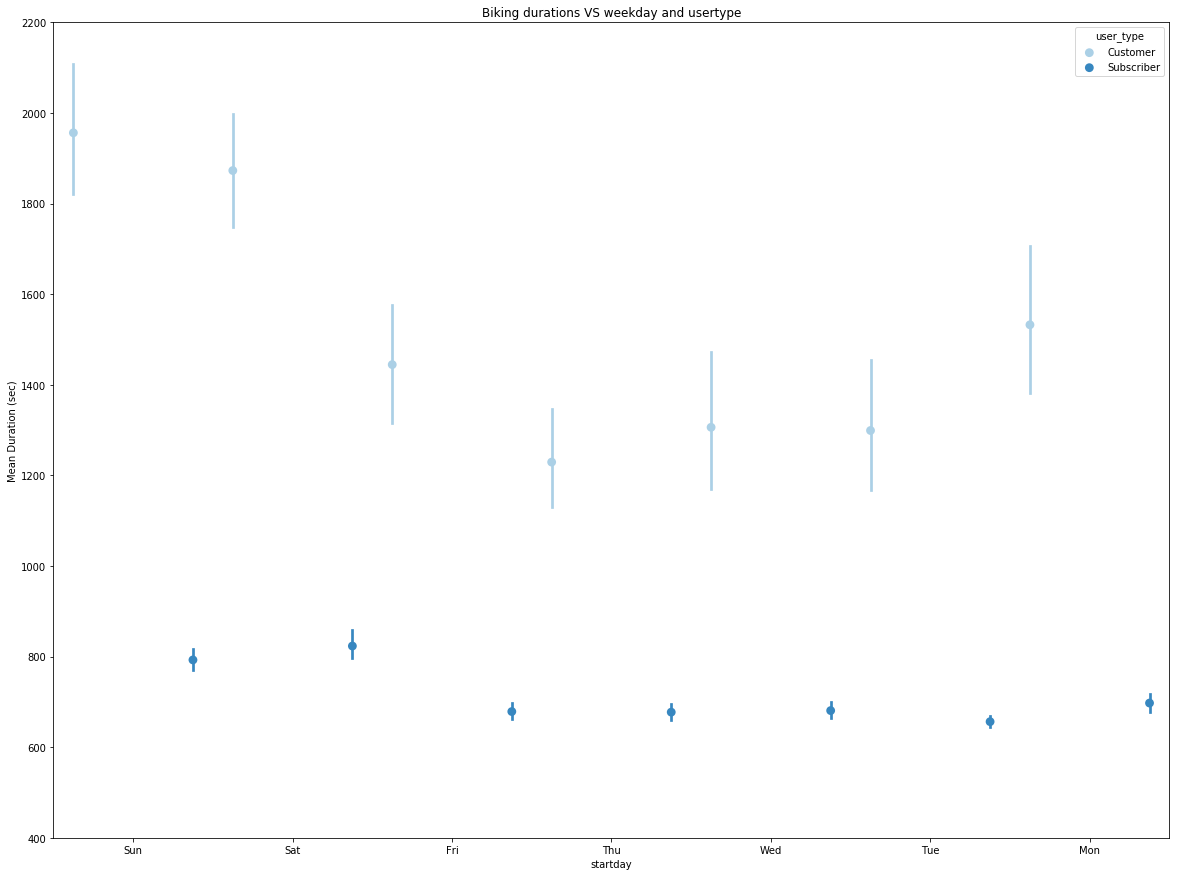

In [47]:
#setting figure dimensions
fig = plt.figure(figsize = [20, 15])

#plotting pointplot

ax = sb.pointplot(data = df, x = 'start_day_week', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.75);


plotMetadata('startday', 'Mean Duration (sec)', 'Biking durations VS weekday and usertype')

plt.yscale('linear');
plt.yticks(np.arange(400, 2400, 200))
ax.set_yticklabels([],minor = True);

Customers took more time when compared to subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The variables in this dataset are not dependant on one another. I havenot found the features strenghtened each other in terms of features of my interest.



### Were there any interesting or surprising interactions between features?

Females took long rides when compared to males.
Customers took more time on average when compared to subscribers.
When compared to older people, younger people were participated more.
When compared to weekends, Wednesday and Thursday has more number of rides with subscribers.
Overall male subscribers were particiated more.

